## TUGAS KLASIFIKASI DATA PROYEK SAINS DATA

Nama  : Enjel Putri Sabrina    
NIM   : 210411100126        
Kelas : B  

## -- BUSSINESS UNDERSTANDING --

Identifikasi kasus :


Liver merupakan salah satu penyakit kronis yang paling umum di Timur Laut Andhra Pradesh, India. Kematian akibat liver ini terus meningkat, seiring dengan meningkatnya angka konsumsi alkohol, infeksi hepatitis kronis, dan penyakit hati terkait obesitas

Tujuan :


Membangun model klasifikasi liver sebagai upaya deteksi terhadap penyakit liver dengan menggunakan model Random Forest. Dengan melakukan analisa pada data liver, model ini dapat membangun prediksi yang akurat sehingga memungkinkan tenaga kesehatan untuk mengidentifikasi pasien liver.

## -- DATA UNDERSTANDING --

Tahapan Pada Data Understanding merupakan tahapan dimana kita perlu memahami data yang akan diolah. Adapun hal - hal yang perlu dilakukan nantinya untuk memahami dataset ini, yakni


1. Tentang data, mencakup :

    * Pengumpulan dataset
    * Pengenalan singkat mengenai data yang akan diolah
2. Mendeskripsikan data, mencakup :

    * analisa tipe data
    * deskripsi fitur
3. Eksplorasi data, mencakup :

    * Visualisasi data
4. Identifikasi kualitas data :

    * Identifikasi missing value setiap fitur atau kolom
    * Identifikasi data duplikat
    * Identifikasi outlier (data aneh)
    * Identifikasi jumlah data (proporsi data perkelas yang digunakan untuk mengetahui balancing dataset atau keseimbangan data per kelas)

### **1. Tentang Data**

### - Teknik Pengumpulan Data


Dalam proyek ini menggunakan kumpulan data yang tersedia di kaggle yang berupa csv. Fitur-fitur yang ada berupa catatan pasien liver dan pasien non liver yang dikumpulkan dari India dengan jumlah dataset sebanya 583 data.


In [1]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data.head(5)

,Selector,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,1,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.9
1,1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.7
2,1,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.9
3,1,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.0
4,1,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.4


In [2]:
# rincian dataset (jumlah data dan kolom)

print("Jumlah data : ", data.shape[0])
print("Jumlah kolom : ", data.shape[1])

Jumlah data :  583
Jumlah kolom :  11


Dataset ini sebanyak 583 data dengan rincian pelabelan sebagai berikut ini :

- Pasien liver (1) = 416 data
- Pasien Nonliver (2) = 167 data
*Perbedaan yang signifikan pada jumlah data antar label sehingga perlu diseimbangkan terlebih dahulu*

Untuk mendeteksi penyakit liver di India, dapat dilihat dari ciri-ciri sebagai berikut :

1. **Age**: Mewakili usia pasien, mengindikasikan faktor demografis yang mungkin relevan dengan kesehatan hati.

2. **Gender**: Menunjukkan jenis kelamin pasien, memberikan informasi tentang distribusi penyakit hati antar jenis kelamin.

3. **TB (Total Bilirubin)**: Mengukur total bilirubin dalam darah, yang dapat menjadi indikator fungsi dan kesehatan hati. Bilirubin merupakan pigmen kuning yang dihasilkan sebagai hasil pemecahan hemoglobin dari sel darah merah yang tua di hati.

4. **DB (Direct Bilirubin)**: Secara khusus mengukur bilirubin langsung atau tidak terkonjugasi, memberikan informasi lebih rinci tentang tingkat bilirubin terkait dengan kesehatan hati.

5. **Alkphos (Alkaline Phosphatase)**: Mengukur level alkaline phosphatase, enzim yang dapat terkait dengan kesehatan hati dan tulang. Tingkat yang meningkat dapat menunjukkan masalah hati.

6. **SGPT (Alamine Aminotransferase)**: Mengukur level SGPT, sebuah enzim yang dapat menunjukkan kerusakan atau peradangan pada hati. Tingkat SGPT yang tinggi dalam tes darah dapat menjadi indikasi kerusakan hati, seperti hepatitis atau kerusakan hati akibat alkohol atau obat-obatan.

7. **SGOT (Aspartate Aminotransferase)**: Mengukur level SGOT, enzim yang terdapat di berbagai jaringan, dengan level yang tinggi mungkin mengindikasikan masalah pada hati atau jantung.

8. **TP (Total Protein)**: Menunjukkan total protein dalam darah, yang dapat terkait dengan fungsi hati dan kesehatan secara umum.

9. **Alb (Albumin)**: Mengukur tingkat albumin dalam darah, protein penting yang diproduksi oleh hati, dan dapat menjadi indikator fungsi hati. Penurunan kadar albumin dalam darah dapat terjadi pada pasien dengan penyakit hati yang merusak kemampuan hati untuk memproduksi protein ini.

10. **A/G Ratio (Rasio Albumin/Globulin)**: Mewakili rasio albumin terhadap globulin dalam darah, memberikan wawasan tentang fungsi hati dan ginjal.

11. **Selector**: kolom yang digunakan untuk pelabelan diagnosa liver dan non liver


### **2. Mendeskripsikan Data**

In [3]:
data.columns

Index(['Selector', 'Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot',
       'TP', 'ALB', 'A/G Ratio'],
      dtype='object')

### - Analisa Tipe Data

Dalam analisa data ini, terdapat tipe data yang ditemukan yaitu tipe data nominal.

- Tipe nominal   

    - memiliki value 1 yang melambangkan ya dan 0 yang melambangkan tidak.
        > Pada data ini mencakup fitur *'Selector'* 
    - memiliki value perempuan dan laki laki.
        > yakni pada fitur *'Gender'*
    - mencakup tipe data numeric.
        > yakni pada fitur *'Age', 'TB', 'DB', 'Alkphos', 'SGPT', 'SGOT', 'TP', 'ALB', 'A/G Ratio'*

### - Deskripsi Fitur

Terdapat beberap fitur yang ada pada dataset ini yaitu sebagai berikut:

1. **Age**: Mewakili usia pasien, mengindikasikan faktor demografis yang mungkin relevan dengan kesehatan hati.

2. **Gender**: Menunjukkan jenis kelamin pasien, memberikan informasi tentang distribusi penyakit hati antar jenis kelamin.

3. **TB (Total Bilirubin)**: Mengukur total bilirubin dalam darah, yang dapat menjadi indikator fungsi dan kesehatan hati.Bilirubin merupakan pigmen kuning yang dihasilkan sebagai hasil pemecahan hemoglobin dari sel darah merah yang tua di hati. 

4. **DB (Direct Bilirubin)**: Secara khusus mengukur bilirubin langsung atau tidak terkonjugasi, memberikan informasi lebih rinci tentang tingkat bilirubin terkait dengan kesehatan hati.

5. **Alkphos (Alkaline Phosphatase)**: Mengukur level alkaline phosphatase, enzim yang dapat terkait dengan kesehatan hati dan tulang. Tingkat yang meningkat dapat menunjukkan masalah hati.

6. **SGPT (Alamine Aminotransferase)**: Mengukur level SGPT, sebuah enzim yang dapat menunjukkan kerusakan atau peradangan pada hati. Tingkat SGPT yang tinggi dalam tes darah dapat menjadi indikasi kerusakan hati, seperti hepatitis atau kerusakan hati akibat alkohol atau obat-obatan.

7. **SGOT (Aspartate Aminotransferase)**: Mengukur level SGOT, enzim yang terdapat di berbagai jaringan, dengan level yang tinggi mungkin mengindikasikan masalah pada hati atau jantung.

8. **TP (Total Protein)**: Menunjukkan total protein dalam darah, yang dapat terkait dengan fungsi hati dan kesehatan secara umum.

9. **Alb (Albumin)**: Mengukur tingkat albumin dalam darah, protein penting yang diproduksi oleh hati, dan dapat menjadi indikator fungsi hati. Penurunan kadar albumin dalam darah dapat terjadi pada pasien dengan penyakit hati yang merusak kemampuan hati untuk memproduksi protein ini.

10. **A/G Ratio (Rasio Albumin/Globulin)**: Mewakili rasio albumin terhadap globulin dalam darah, memberikan wawasan tentang fungsi hati dan ginjal.

11. **Selector**: kolom yang digunakan untuk pelabelan diagnosa liver dan non liver.
- 1: Liver
- 2: NonLiver

### **3. Eksplorasi Data**

### - Visualisasi Data
Visualisasi data dilakukan untuk memudahkan dalam memahami data dengan memperoleh informasi sebaran nilai dari dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

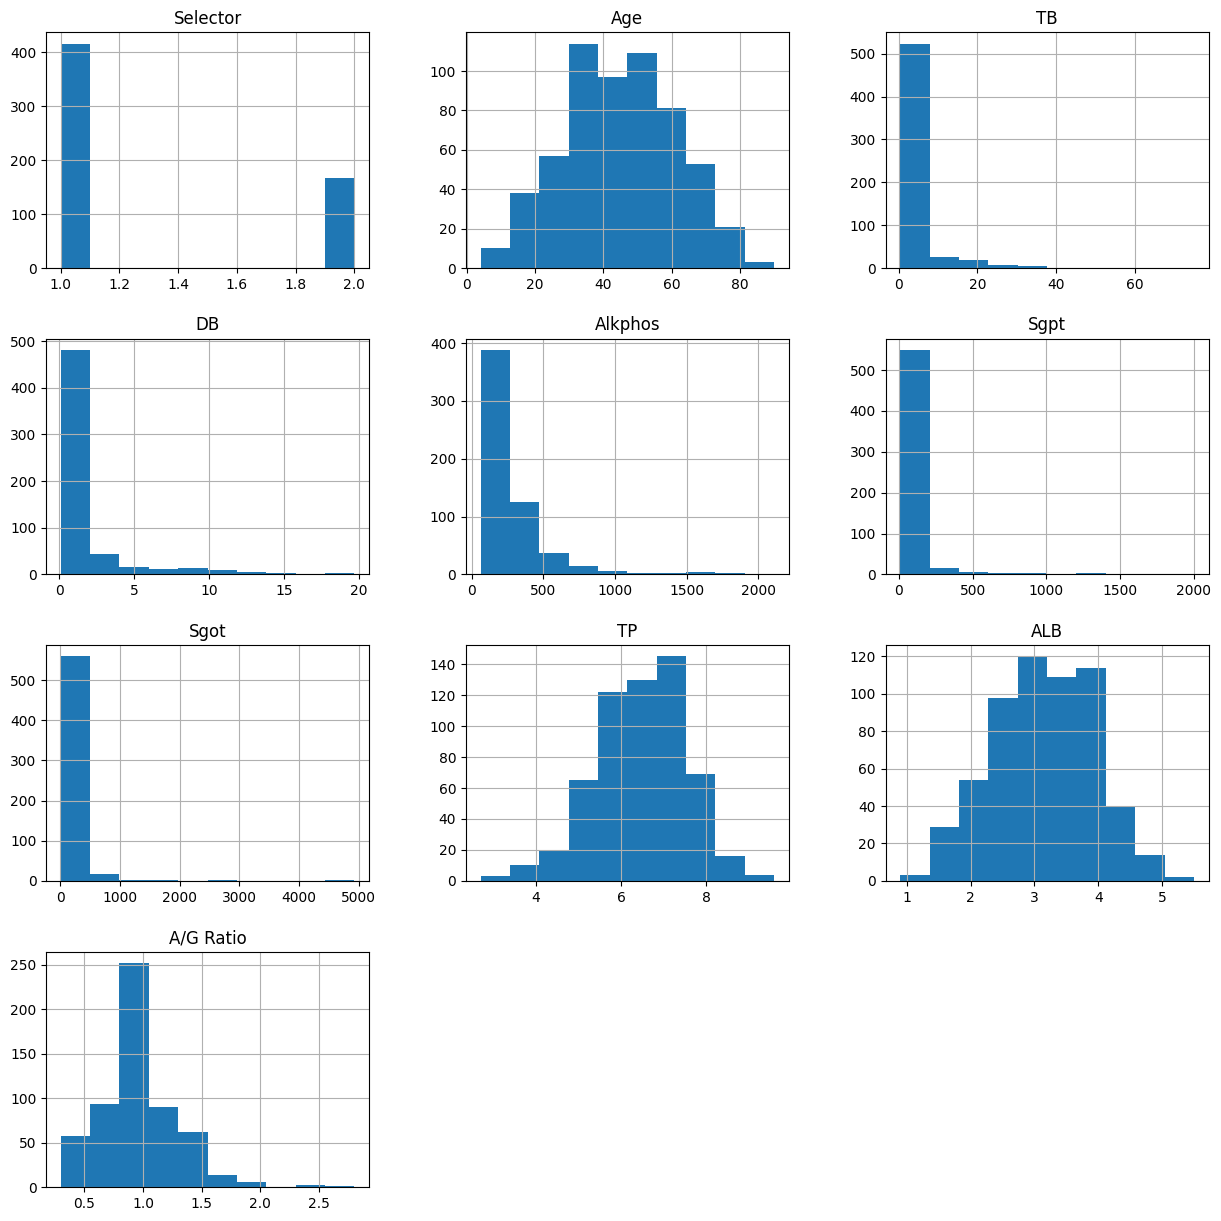

In [4]:
import matplotlib.pyplot as plt

data.hist(figsize=(15,15))
plt.show

### **4. Identifikasi Kualitas Data**

### - Identifikasi Missing value

Missing value yaitu hilangnya satu atau beberapa data dalam suatu atribut. Penyebab dari adanya missing value yaitu kesalahan pada saat memasukkan data, variabel yang tidak relevan, dan ketidakmampuan merekam informasi, serta penghapusan.

Penanganan Missing value : Jika atribut tersebut memiliki banyak missing value, maka atribut tersebut perlu dihapus dari dataset. Namun jika hanya terdapat beberapa data yang missing value bisa dilakukan drop dari baris yang memiliki missing value atau mengisinya dengan rata-rata nilai pada atribut yang bersangkutan.

Contoh adanya missing value:

<table>
    <tr>
    <td>fitur1</td>
    <td>fitur2</td>
    </tr>
    <tr>
    <td></td>
    <td>22</td>
    </tr>
    <tr>
    <td></td>
    <td>20</td>
    </tr>
    <tr>
    <td>4</td>
    <td>14</td>
    </tr>
    <tr>
    <td></td>
    <td>5</td>
    </tr>
    <tr>
    <td></td>
    <td>1</td>
    </tr>
</table>  

Dari tabel di atas, fitur 1 memiliki banyak sekali missing value sehingga atribut fitur 1 perlu dihilangkan.

Untuk mengidentifikasi ada tidaknya missing value, menggunakan fungsi *isna( )* yang digunakan untuk mengidentifikasi apakah setiap fitur dalam dataset memiliki nilai yang hilang (NaN atau NULL). Selain itu, juga menggunakan fungsi *any( )* yang digunakan untuk menentukan apakah ada setidaknya satu nilai yang hilang dalam setiap fitur.

In [5]:
# menghitung apakah ada nilai yang hilang dalam setiap kolom
missing_values = data.isna().any()

# menampilkan hasil
print("Apakah ada nilai yang hilang dalam setiap kolom:")
print(missing_values)

Apakah ada nilai yang hilang dalam setiap kolom:
Selector     False
Age          False
Gender       False
TB           False
DB           False
Alkphos      False
Sgpt         False
Sgot         False
TP           False
ALB          False
A/G Ratio     True
dtype: bool


*Note* : terdapat missing value pada fitur *A/G Ratio*

Jumlah missing value pada data

In [6]:
missing_values = data.isnull().sum()
print("Jumlah Missing Values dalam Setiap Kolom:")
print(missing_values)

Jumlah Missing Values dalam Setiap Kolom:
Selector     0
Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
dtype: int64


### - Identifikasi Duplikat data

Untuk mengidentifikasi baris-baris dalam dataset yang merupakan duplikat dari baris-baris sebelumnya yaitu dengan menggunakan fungsi *dupicate( )*

In [7]:
jumlah_duplikat = data.duplicated().sum()

# menampilkan jumlah data yang duplikat
print("Jumlah data yang duplikat:", jumlah_duplikat)

Jumlah data yang duplikat: 13


*Note* : terdapat beberapa baris data yang sama, sehingga data tersebut harus dihilangkan untuk menghindari adanya data yang redundan

### - Identifikasi Outlier

Outlier merupakan nilai yang signifikan atau ekstrem yang berbeda secara signifikan dari sebagian besar dalam satu dataset.

Contoh :  

<table>
    <tr>
    <td>Nama</td>
    <td>Nilai Ujian</td>
    </tr>
    <tr>
    <td>siswa 1</td>
    <td>79</td>
    </tr>
    <tr>
    <td>siswa 2</td>
    <td>9000</td>
    </tr>
    <tr>
    <td>siswa 3</td>
    <td>87</td>
    </tr>
    <td>siswa 4</td>
    <td>78</td>
    <tr>
    <td>siswa 5</td>
    <td>84</td>
    </tr>
</table>

Dari data tersebut ditemukan satu outlier yakni pada data siswa 2 yang mana, nilai 9000 merupakan contoh outlier karena nilainya jauh lebih besar daripada nilai-nilai ujian lainnya.

Untuk mengidentifikasi outlier dengan mengimport kelas *LocalOutlierfactor* yang menyediakan implementasi algoritma LOF untuk deteksi outlier.Pada model LOF menggunakan parameter n_neighbors yaitu jumlah tetangga yang akan digunakan dalam perhitungan LOF. Pada model LOF menggunakan fungsi *fit_predict* yang digunakan untuk menilai apakah setiap baris dalam dataset merupakan outlier atau bukan, hasilnya yaitu dengan nilai -1 untuk outlier dan 1 untuk data yang bukan outlier.

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import pandas as pd


# Membagi data menjadi numerik dan kategorikal
numerical_cols = data.select_dtypes(include=['int', 'float']).columns
categorical_cols = data.select_dtypes(include='object').columns

# Menggunakan SimpleImputer untuk mengisi nilai yang hilang dengan mean (dapat disesuaikan)
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

# Label Encoding untuk kolom kategorikal
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: label_encoder.fit_transform(col))

# Menggabungkan kolom numerik dan kategorikal
selected_data = data[numerical_cols.union(categorical_cols)]

# Normalisasi data numerik
scaler = StandardScaler()
selected_data[numerical_cols] = scaler.fit_transform(selected_data[numerical_cols])

# Membuat model LOF
clf = LocalOutlierFactor(n_neighbors=20)  # Jumlah tetangga yang digunakan
outlier_scores = clf.fit_predict(selected_data)

# Menampilkan indeks outlier
outlier_indices = np.where(outlier_scores == -1)[0]
print("Jumlah outlier:", len(outlier_indices))


Jumlah outlier: 38


*Note* : terdapat data yang memiliki outlier, sehingga data tersebut harus dihilangkan

### - Identifikasi Jumlah Data

Dengan mengidentifikasi jumlah data, dapat mengetahui seberapa berbeda pada jumlah data di tiap-tiap label. Jika jumlah data antar label memiliki perbedaan yang sangat jauh maka akan mempengaruhi akurasi dan hasil klasifikasi sehingga perlu dilakukan penyeimbangan jumlah data di tiap labelnya.

In [9]:
# menghitung jumlah target pada data tanpa outlier
tiap_label = data['Selector'].value_counts()

print("Jumlah data pada tiap target :")
print(tiap_label)

Jumlah data pada tiap target :
Selector
1.0    416
2.0    167
Name: count, dtype: int64


*Note* : terjadi ketimpangan data yang signifikan sehingga dilakukan balancing data agar proporsi data tidak condong pada satu kelas saja.

**Hasil Analisa Pada Data Understanding :**

1. Data memiliki _missing values_
2. Data memiliki 13 data duplikat atau redundan
3. Data memiliki 1 outlier
4. Perbandingan proporsi data tiap target sangat jauh 

## -- DATA PREPROCESSING --

Setelah memahami data, akan dilakukan tahap preprocessing untuk menangani masalah pada data yang sudah didefinisikan pada data understanding, yaitu:

1. Menghapus Missing Value
2. Menghapus Data Duplikat
3. Menghapus Outlier
4. Menyeimbangkan proporsi data tiap target

Setelah data siap, akan dilakukan skoring fitur kembali.

In [10]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data.head(5)

,Selector,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,1,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.9
1,1,62,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.7
2,1,62,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.9
3,1,58,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.0
4,1,72,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.4


### - Melakukan labelin pada kolom Gender

Labelin adalah suatu tindakan yang memberikan label atau penanda pada data dengan tujuan untuk mengidentifikasi, mengklasifikasikan, atau memberikan informasi tambahan tentang data tersebut. Untuk melakukan labelin, menggunakan fungsi *LabelEncoder* yang memberikan label numerik pada nilai-nilai kategori untuk memungkinkan model machine learning memahami dan bekerja dengan data tersebut.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengubah label menjadi numerik
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [12]:
# rincian dataset (jumlah data dan kolom)

print("Jumlah data : ", data.shape[0])
print("Jumlah kolom : ", data.shape[1])

Jumlah data :  583
Jumlah kolom :  11


### 1. Menghapus Data yang Missing Value

Missing value yaitu hilangnya satu atau beberapa data dalam suatu atribut. Penyebab dari adanya missing value yaitu kesalahan pada saat memasukkan data, variabel yang tidak relevan, dan ketidakmampuan merekam informasi, serta penghapusan.

Penanganan Missing value : Jika atribut tersebut memiliki banyak missing value, maka atribut tersebut perlu dihapus dari dataset. Namun jika hanya terdapat beberapa data yang missing value bisa dilakukan drop dari baris yang memiliki missing value atau mengisinya dengan rata-rata nilai pada atribut yang bersangkutan.

Contoh adanya missing value:

<table>
    <tr>
    <td>fitur1</td>
    <td>fitur2</td>
    </tr>
    <tr>
    <td>7</td>
    <td>22</td>
    </tr>
    <tr>
    <td></td>
    <td>20</td>
    </tr>
    <tr>
    <td>4</td>
    <td>14</td>
    </tr>
    <tr>
    <td>9</td>
    <td>5</td>
    </tr>
    <tr>
    <td></td>
    <td>1</td>
    </tr>
</table>  

Dari tabel di atas, memiliki missing value sehingga baris ke 2 dan baris ke 4 perlu dihilangkan.
Untuk menghapus missing value digunakan fungsi *dropna()*

In [13]:
data = data.dropna()

### 2. Menghapus Data Duplikat

Duplikat data merupakan suatu baris memiliki nilai yang sama persis di semua kolom pada baris lainnya.

contoh :

<table>
    <tr>
    <td>Nama</td>
    <td>Biologi</td>
    <td>Kimia</td>
    <td>Matematika</td>
    <td>Fisika</td>
    </tr>
    <tr>
    <td>Murid1</td>
    <td>80</td>
    <td>78</td>
    <td>90</td>
    <td>88</td>
    </tr>
    <tr>
    <td>Murid2</td>
    <td>92</td>
    <td>100</td>
    <td>87</td>
    <td>76</td>
    </tr>
    <tr>
    <td>Murid3</td>
    <td>92</td>
    <td>100</td>
    <td>87</td>
    <td>76</td>
    </tr>
    <tr>
    <td>Murid4</td>
    <td>88</td>
    <td>87</td>
    <td>75</td>
    <td>79</td>
    </tr>
</table>

Data pada baris ke 2 dan baris ke 3 memiliki nilai yang sama sehingga nantinya data pada baris ke 3 akan dihapus. Untuk menghapus data duplikat digunakan fungsi *drop_duplicates()*

In [14]:
# Menghapus data yang duplikat
data_bersih = data.drop_duplicates()

print("Banyaknya sisa data : ", data_bersih.shape[0])

Banyaknya sisa data :  566


### 3. Menghapus Outlier

Outlier merupakan nilai yang signifikan atau ekstrem yang berbeda secara signifikan dari sebagian besar dalam satu dataset.

Contoh :  

<table>
    <tr>
    <td>Nama</td>
    <td>Nilai Ujian</td>
    </tr>
    <tr>
    <td>siswa 1</td>
    <td>79</td>
    </tr>
    <tr>
    <td>siswa 2</td>
    <td>9000</td>
    </tr>
    <tr>
    <td>siswa 3</td>
    <td>87</td>
    </tr>
    <td>siswa 4</td>
    <td>78</td>
    <tr>
    <td>siswa 5</td>
    <td>84</td>
    </tr>
</table>

Dari data tersebut ditemukan satu outlier yakni pada data siswa 2 yang mana, nilai 9000 merupakan contoh outlier karena nilainya jauh lebih besar daripada nilai-nilai ujian lainnya.



In [15]:
from sklearn.neighbors import LocalOutlierFactor

# Menggunakan Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=5)
outlier_scores = lof.fit_predict(data)

data_bersih = data[outlier_scores != -1]
print("Sisa data : ", data_bersih.shape[0])

Sisa data :  559


### 4. Menyeimbangkan Data Tiap Target

Dengan mengetahui jumlah data, dapat mengetahui seberapa berbeda pada jumlah data di tiap-tiap label. Jika jumlah data antar label memiliki perbedaan yang sangat jauh maka akan mempengaruhi akurasi dan hasil klasifikasi sehingga perlu dilakukan penyeimbangan jumlah data di tiap labelnya.

In [16]:
fitur = data_bersih.drop(columns=['Selector'])
target = data_bersih['Selector']

target.value_counts()

Selector
1    395
2    164
Name: count, dtype: int64

### - Penyeimbangan Jumlah atau Proporsi Data

In [17]:
from imblearn.under_sampling import RandomUnderSampler

smote = RandomUnderSampler()
fitur_seimbang, target_seimbang = smote.fit_resample(fitur, target)

print("Jumlah sampel setelah diseimbangkan : ")
print(target_seimbang.value_counts())

Jumlah sampel setelah diseimbangkan : 
Selector
1    164
2    164
Name: count, dtype: int64


### - Visualisasi Banyaknya Data di Tiap Label

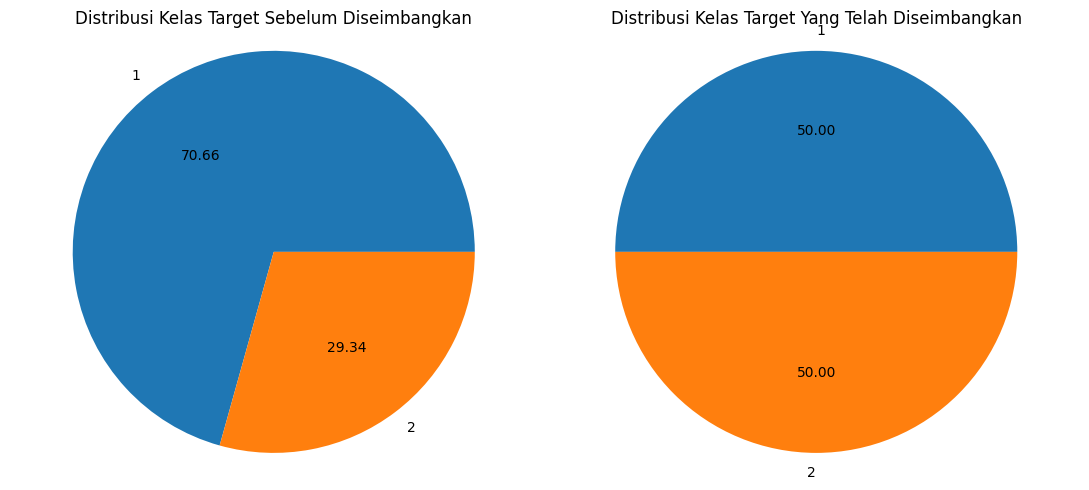

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(11, 5))

# Plot distribusi kelas target sebelum penyeimbangan
target_tidak_seimbang = target.value_counts()
axs[0].pie(target_tidak_seimbang, labels=target_tidak_seimbang.index, autopct='%.2f')
axs[0].set_title('Distribusi Kelas Target Sebelum Diseimbangkan')
axs[0].axis('equal')

# Plot distribusi kelas target setelah penyeimbangan
target_sudah_seimbang = target_seimbang.value_counts()
axs[1].pie(target_sudah_seimbang, labels=target_sudah_seimbang.index, autopct='%.2f')
axs[1].set_title('Distribusi Kelas Target Yang Telah Diseimbangkan')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

### - Hasil Preprocessing Data

simpan data yang telah seimbang di dalam file csv baru

In [19]:
import pandas as pd

# Membuat DataFrame dari fitur dan target yang telah seimbang
data_seimbang = pd.concat([fitur_seimbang, target_seimbang], axis=1)

# Menyimpan DataFrame ke dalam file CSV
data_seimbang.to_csv('data_seimbang.csv', index=False)

### - Feature Selection

Skoring fitur dilakukan dapat mengetahui fitur mana yang penting dan yang tidak. Dikarenakan tidak semua fitur dapat dijadikan ciri untuk melakukan klasifikasi.

Pada skoring fitur mengimport kelas *SelectKBest* yang digunakan untuk memilih k fitur terbaik berdasrakan suatu fungsi skor dan *mutual_info_classif* digunakan untuk mengukur seberapa banyak informasi yang dibawa oleh suatu fitur terhadap target.

Melakukan skoring fitur pada data

In [20]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Buat objek SelectKBest dengan mutual_info_classif sebagai fungsi skor
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # 'all' berarti akan mempertahankan semua fitur

# Hitung skor fitur
k_best.fit(fitur_seimbang, target_seimbang)
scores = k_best.scores_

# Dapatkan nama fitur dari kolom data Anda
fitur_names = fitur.columns

# Tampilkan skor fitur berserta namanya
for i, (score, fitur_name) in enumerate(zip(scores, fitur_names)):
    print(f"Fitur {i}: {fitur_name}, Skor: {score}")

Fitur 0: Age, Skor: 0.08364241423243701
Fitur 1: Gender, Skor: 0.028502878921184083
Fitur 2: TB, Skor: 0.10373086325954839
Fitur 3: DB, Skor: 0.07761386953230742
Fitur 4: Alkphos, Skor: 0.053755060611790695
Fitur 5: Sgpt, Skor: 0.08905960348306685
Fitur 6: Sgot, Skor: 0.11271929723285545
Fitur 7: TP, Skor: 0.025086139833712995
Fitur 8: ALB, Skor: 0.04669794088913526
Fitur 9: A/G Ratio, Skor: 0.06695672361523552


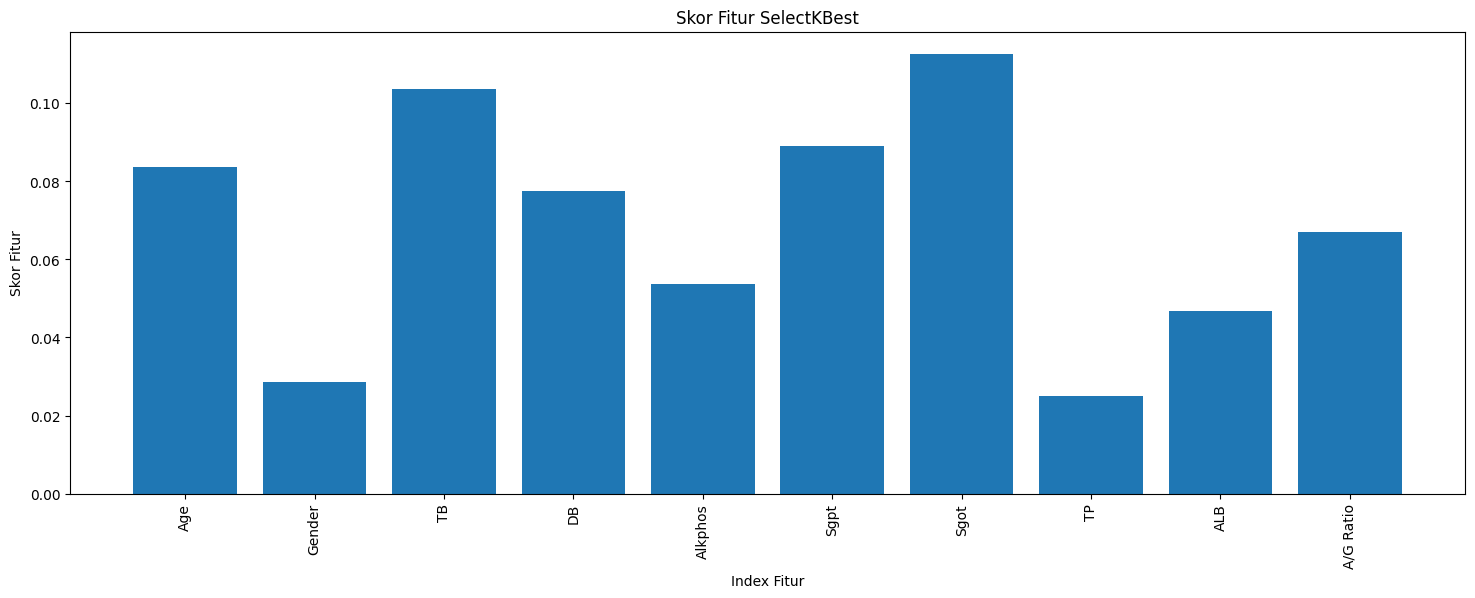

In [21]:
import matplotlib.pyplot as plt

# Tampilkan skor fitur dalam grafik
plt.figure(figsize=(18, 6))
plt.bar(fitur_names, scores)
# Menambahkan label pada sumbu x dan y, serta judul grafik
plt.xlabel("Index Fitur")
plt.ylabel("Skor Fitur")
plt.title("Skor Fitur SelectKBest")
# Menambahkan label nama fitur pada sumbu x
plt.xticks(range(len(fitur_names)), fitur_names, rotation=90)
# Menampilkan grafik
plt.show()


## -- MODELLING -- 

### - Load Dataset

In [22]:
import pandas as pd

# kolom-kolom yang ingin Anda pertahankan
kolom_pilihan = ['Age', 'TB', 'DB', 'Sgpt', 'Selector'] 

# Buat dataset baru hanya dengan kolom yang dipilih
dataset_baru = data_seimbang[kolom_pilihan]

# Simpan dataset baru dalam file CSV
dataset_baru.to_csv('dataset_baru.csv', index=False)  

dataset_baru = pd.read_csv('dataset_baru.csv')
dataset_baru.head(5)

,Age,TB,DB,Sgpt,Selector
0,49,0.8,0.2,23.0,1
1,14,1.4,0.5,58.0,1
2,62,1.2,0.4,38.0,1
3,35,1.0,0.3,133.0,1
4,18,0.8,0.2,55.0,1


In [23]:
print("Jumlah data : ", dataset_baru.shape[0])
print("Jumlah kolom : ", dataset_baru.shape[1])

Jumlah data :  328
Jumlah kolom :  5


### - Split Dataset

In [24]:
from sklearn.model_selection import train_test_split

# memisahkan kolom fitur dan target
fitur = dataset_baru.drop(columns=['Selector'], axis =1)
target = dataset_baru['Selector']

# melakukan pembagian dataset, dataset dibagi menjadi 80% data training dan 20% data testing
fitur_train, fitur_test, target_train, target_test = train_test_split(fitur, target, test_size = 0.2, random_state=42)

In [25]:
print("Jumlah fitur yang digunakan : ", fitur_train.shape[1])
print("Jumlah data training : ", fitur_train.shape[0])
print("Jumlah data testing : ", fitur_test.shape[0])

Jumlah fitur yang digunakan :  4
Jumlah data training :  262
Jumlah data testing :  66


In [26]:
target_train.value_counts()

Selector
2    132
1    130
Name: count, dtype: int64

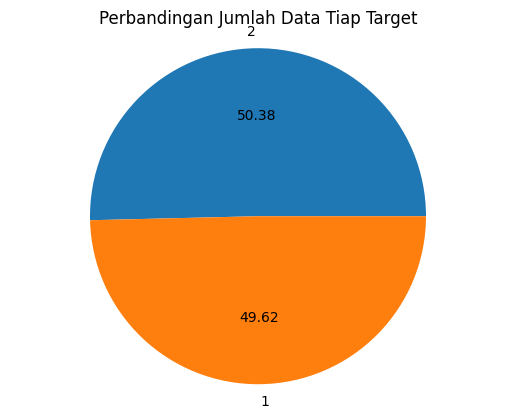

In [27]:
import matplotlib.pyplot as plt

value_counts = target_train.value_counts()

plt.pie(value_counts, labels=value_counts.index, autopct='%.2f')
plt.title('Perbandingan Jumlah Data Tiap Target')
plt.axis('equal')
plt.show()

### - Normalisasi Data

Normalisasi data adalah proses transformasi data dari fitur-fitur dalam dataset sehingga nilai dari fitur tersebut berada dalam rentang yang seragam. 


Z-score normalization, atau sering disebut sebagai standardization, adalah teknik normalisasi data yang mengubah nilai-nilai variabel sehingga distribusi data memiliki rata-rata (μ) 0 dan deviasi standar(σ) 1.

Rumus untuk mencari Zscore:

$$ Z = \frac {X – μ}{σ} $$

Penjelasan rumusnya:
- Z = nilai yang sudah dinormalisasikan
- X = nilai dari fitur
- μ = rata-rata
- σ = standar deviasi

In [28]:
import pickle
from sklearn.preprocessing import StandardScaler

# menentukan lokasi file pickle akan disimpan
path = 'zscorescaler.pkl'

# membuat dan melatih objek StandardScaler
zscore_scaler = StandardScaler()
zscore_scaler.fit(fitur_train)

# menyimpan model ke dalam file pickle
with open(path, 'wb') as file:
    pickle.dump(zscore_scaler, file)

# memanggil kembali model normalisasi zscore dari file pickle
with open(path, 'rb') as file:
    zscore_scaler = pickle.load(file)

# menerapkan normalisasi zscore pada data training
zscore_training = zscore_scaler.transform(fitur_train)

# menerapkan normalisasi zscore pada data testing
zscore_testing = zscore_scaler.transform(fitur_test)

### - Membuat model

### Konsep Random Forest

Menggunakan model Random Forest, random forest yaitu suatu algoritma ensemble yang menggabungkan sejumlah besar pohon keputusan untuk membuat prediksi yang lebih kuat dan stabil. Pembentukan pohon dengan sample data dengan menggunakan variable yang diambil secara acak dan menjalankan klasifikasi pada smeua pohon yang terbentuk.
Konsep -  konsep yang ada pada random forest:
- Bagging : dimana dataset asli dipilih secara acak dengan penggantian untuk membuat beberapa dataset pelatihan untuk setiap pohonnya.
- Random feature selection : setiap pohon dibangun menggunakan subset acak dari fitur yang dipilih dari seluruh fitur - fitur yang ada pada dataset tersebut. Hal ini membantu mencegah pohon menjadi terlalu serupa dan meningkatkan keberagaman model.
- Voting (majority voting) : untuk klasifikasi, random forest melakukan voting mayoritas dari semua pohon keputusan. Sedangkan untuk regresi, digunakan untuk mengambil rata-rata prediksi dari semua pohon.

<!-- Rumus umum untuk pembentukan pohon dalam random forest:
1. Gini Impurity (untuk klasifikasi):


$$ Gini(t) = 1 - \sum_{i=1}^{k} (p_i)^2 $$

penjelasan:
- Gini(t) = nilai ketidakmurnian gini di simpul t
- k = jumlah target kelas
- pi = proporsi sampel yang termasuk dalam elas i di simpul t

2. Mean Squared Error (MSE) (untuk regresi):


$$ MSE(t) = \frac {1}{n_t} \sum {i∈D_t} (y_i - \bar{y}_t)^2 $$ -->

penjelasan:
- MSE(t) = kesalahan kuadrat rata-rata di simpul t
- nt = jumlah sampel di simpul t
- Dt = set data pelatihan di simpul t
- yi = nilai target untuk sampel ke-i
- yt = rata-rata nilai target di simpul t

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definisi model random forest 
rf = RandomForestClassifier()

# Definisi grid parameter yang akan diuji
param_grid = {
    'n_estimators': [10, 50, 100, 200],  
    'max_depth': [None, 10, 20, 30],     
    'min_samples_split': [2, 5, 10],     
    'min_samples_leaf': [1, 2, 4],       
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Latih model dengan data latih dan mencari parameter terbaik
grid_search.fit(zscore_training, target_train)

# Hasil parameter terbaik
best_params = grid_search.best_params_
print("Parameter terbaik:", best_params)

# Model dengan parameter terbaik
best_rf = grid_search.best_estimator_

# Evaluasi model terbaik pada data uji
accuracy = best_rf.score(zscore_testing, target_test)
print("Akurasi model terbaik:", accuracy)

Parameter terbaik: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10}
Akurasi model terbaik: 0.6666666666666666


### - Simpan Model

Model disimpan dalam file dengan format .pkl menggunakan modul pickle. Dikarenakan jika sewaktu-waktu model ini akan digunakan kembali cukup membuka model.pkl saja.

In [30]:
import pickle

# Model dengan parameter terbaik
best_rf = grid_search.best_estimator_

# Simpan model Decision Tree terbaik ke dalam file pickle
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

# Evaluasi model terbaik pada data uji
accuracy = best_rf.score(zscore_testing, target_test)
print("Akurasi model terbaik:", accuracy)

Akurasi model terbaik: 0.6666666666666666


## -- EVALUATION --

In [31]:
with open('model_rf.pkl', 'rb') as file:
    model_rf = pickle.load(file)

model_rf.fit(zscore_training, target_train)
y_pred_rf = model_rf.predict(zscore_testing)

### - Akurasi

In [32]:
from sklearn.metrics import accuracy_score

akurasi_rf = accuracy_score(target_test, y_pred_rf)
print('Akurasi Menggunakan Random Forest : ', akurasi_rf)

Akurasi Menggunakan Random Forest :  0.6060606060606061


### - Presisi dan Recall

In [33]:
from sklearn.metrics import precision_score, recall_score

# Hitung presisi
precision = precision_score(target_test, y_pred_rf, average='macro')

# Hitung recall
recall = recall_score(target_test, y_pred_rf, average='macro')

print("Presisi :", precision)
print("Recall :", recall)

Presisi : 0.6083333333333334
Recall : 0.6075367647058824


### - F-1 Score

In [34]:
from sklearn.metrics import f1_score

# Hitung f1-score
f1_score = f1_score(target_test, y_pred_rf, average='macro')

print("F1 - Score :", precision)

F1 - Score : 0.6083333333333334


### - Confussion Matrix

Confusion Matrix (matriks kebingungan) adalah tabel yang digunakan untuk mengevaluasi kinerja suatu model klasifikasi pada data uji, di mana kita tahu nilai sebenarnya dari data tersebut.

Confussion matrix terdiri dari empat istilah utama:

1. True Positive (TP): Data yang benar-benar positif dan diprediksi positif oleh model.

2. True Negative (TN): Data yang benar-benar negatif dan diprediksi negatif oleh model.

3. False Positive (FP): Data yang benar-benar negatif tetapi diprediksi positif oleh model.

4. False Negative (FN): Data yang benar-benar positif tetapi diprediksi negatif oleh model.

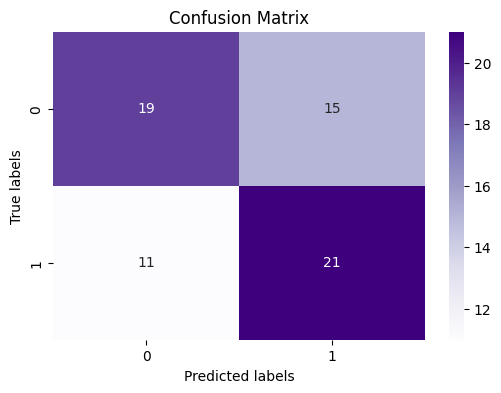

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(target_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Dari natrik di atas, diperoleh informasi sebagai berikut:
- Pasien non liver diprediksi benar ada 21 data
- Pasien liver diprediksi benar ada 19 data